<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Projects/Classicos/Titanic/Titanic_Survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
people = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")

In [4]:
people.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
people.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
len(people)

891

In [7]:
people = people.drop(['Cabin'],axis = 1)

In [8]:
def pre_process(df):
  df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)
  df['Embarked'] = np.where(df['Embarked']== 'S', 0, df['Embarked'])
  df['Embarked'] = np.where(df['Embarked']== 'C', 1, df['Embarked'])
  df['Embarked'] = np.where(df['Embarked']== 'Q', 2, df['Embarked'])
  df['Fare'] = df['Fare'].fillna(0)
  df['Age'] = df['Age'].fillna(0)
  df['Embarked'] = df['Embarked'].fillna(0)
  df['Fare'] = (df['Fare'] - df['Fare'].min()) / ( df['Fare'].max() - df['Fare'].min())
  return df

In [9]:
# people = people.dropna(subset=['Embarked'])

In [10]:
people['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
people = pre_process(people)

In [12]:
people['Embarked'].unique()

array([0, 1, 2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce58fcef10>,
      dtype=object)

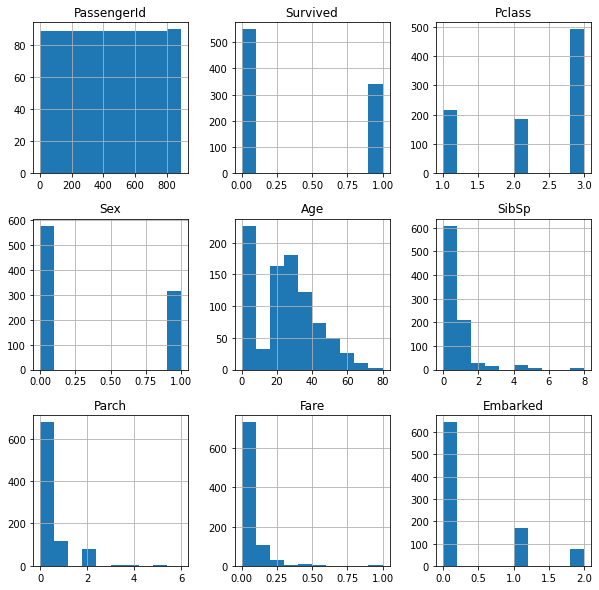

In [13]:
people.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce58b69b10>,
      dtype=object)

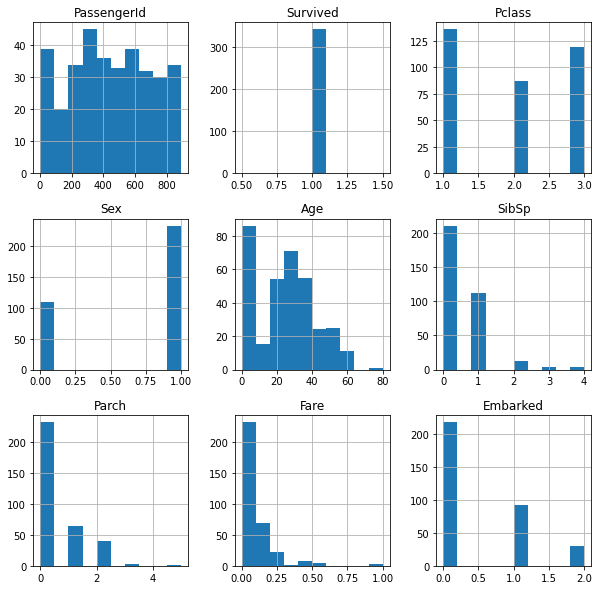

In [14]:
people_1 = people[people['Survived'] == 1]
people_1.hist(figsize=[10,10])

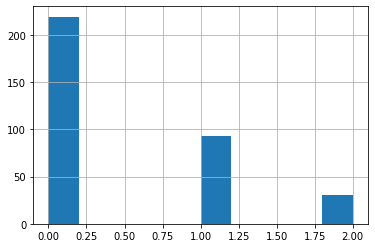

In [15]:
people_1['Embarked'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce58ba9e50>,
      dtype=object)

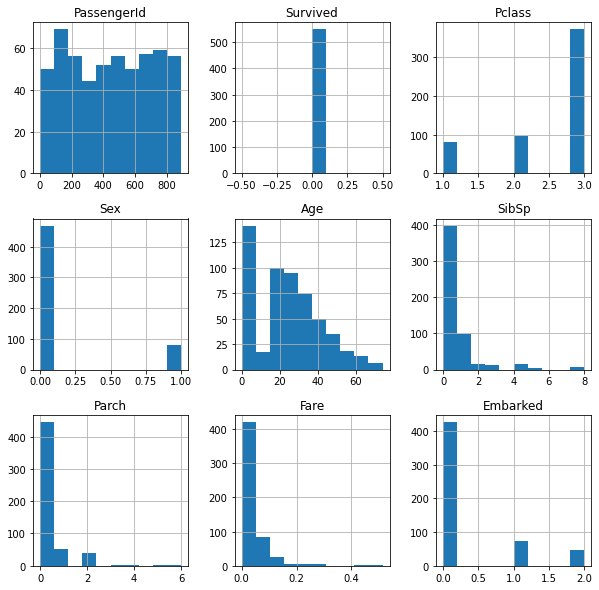

In [16]:
people_0 = people[people['Survived'] == 0]
people_0.hist(figsize=[10,10])

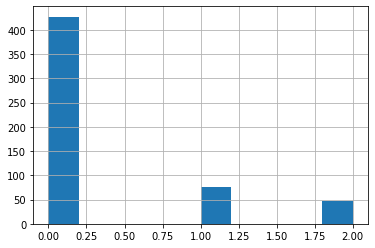

In [17]:
people_0['Embarked'].hist()

muita gente P3 não sobreviveu, junto com SibSp perto de 0, mas tem bastante sobrevivente com 0, e sobrevivendo com 1. E sex == 0 (homens) e Parch == 0

# Separação em Train e Test

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(people[['Sex', 'SibSp', 'Parch']], people['Survived'], test_size=0.2, random_state=3)

In [20]:
colunas_escolhidas = [ 'Sex','Pclass', 'Embarked', 'SibSp']#['Pclass', 'Sex','Embarked'] #[ 'Sex', 'SibSp', 'Parch']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(people[colunas_escolhidas], people['Survived'], test_size=0.1,random_state=42)

Função saída

In [22]:
def csv(y_k, r, title):
  y_k = np.array(y_k)
  df = []
  df = pd.DataFrame(y_k, columns = ['Survived'])
  r['Survived'] = df['Survived']
  r[['PassengerId','Survived']].to_csv(title, index = False, sep = ',')


### Import test

In [23]:
resp = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")

In [24]:
resp.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# resp = resp.drop(['Age', 'Cabin'], axis = 1)
resp = resp.drop(['Cabin'], axis = 1)

In [26]:
resp = pre_process(resp)

# Árvore de decisão


In [27]:
people.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf = clf.fit(X_train,y_train)

In [29]:
y = clf.predict(X_test)

In [30]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y)) #0.77751 -> 'Pclass', 'Sex','Embarked',  e aqui 0.80

DecisionTrees's Accuracy:  0.7888888888888889


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_test))

[[44  9]
 [10 27]]


In [32]:
y_resp = resp

In [33]:
resp = resp[colunas_escolhidas] 

In [34]:
X_test_k = resp

In [35]:
y_k = clf.predict(X_test_k)

In [36]:
type(y_k)

numpy.ndarray

In [37]:
csv(y_k,y_resp, 'tree.csv')

# K Nearest Neighbor(KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [39]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.81111111, 0.76666667, 0.81111111, 0.81111111, 0.81111111,
       0.83333333, 0.81111111, 0.8       , 0.8       , 0.78888889,
       0.78888889, 0.81111111, 0.78888889, 0.78888889])

In [65]:
# Building the model again, using k=1
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=6)

In [66]:
knn_yhat = kNN_model.predict(X_test)
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN F1-score: 0.83


In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(knn_yhat, y_test))

[[48  9]
 [ 6 27]]


In [68]:
y_resp_knn = kNN_model.predict(resp)

In [69]:
csv(y_resp_knn,y_resp, 'knn.csv')

# Support Vector Machine

In [45]:
resp.head()

,Sex,Pclass,Embarked,SibSp
0,0,3,2,0
1,1,3,0,1
2,0,2,2,0
3,0,3,0,0
4,1,3,0,1


In [70]:
from sklearn import svm
SVM_model = svm.SVC(kernel = 'poly', degree=4, random_state = 42,coef0=0.15)
SVM_model.fit(X_train, y_train) 

SVC(coef0=0.15, degree=4, kernel='poly', random_state=42)

In [47]:
yhat = SVM_model.predict(X_test)

In [48]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

SVM F1-score: 0.81


In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yhat, y_test))

[[46  9]
 [ 8 27]]


In [50]:
yhat = SVM_model.predict(resp)

In [51]:
csv(yhat,y_resp[['PassengerId']], 'svm.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
LR_model = LogisticRegression().fit(X_train,y_train)
LR_model

LogisticRegression()

In [72]:
yhat = LR_model.predict(X_test)

In [73]:
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR F1-score: 0.82
LR LogLoss: 0.42


In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yhat, y_test))

[[46  8]
 [ 8 28]]


In [56]:
yhat = LR_model.predict(resp)

In [57]:
csv(yhat,y_resp[['PassengerId']], 'logist.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Foram várias tentativas com as mesma labels com os algoritmos clássicos, próxima hipótese redes neurais

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
network = MLPClassifier(max_iter=1000,solver='adam', hidden_layer_sizes = (5,5,5))
network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000)

In [60]:
previsoes = network.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.8111111111111111

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(previsoes, y_test))

[[46  9]
 [ 8 27]]


In [63]:
yhat = network.predict(resp)

In [64]:
csv(yhat,y_resp[['PassengerId']], 'rnn.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
